In [1]:
import sys
SRC_PATH = "../src"
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

In [2]:
import os

RAW_DATA_PATH = "../../data/raw/valid"
FILEPATHS = {
    "data": {
        "discharge": os.path.join(RAW_DATA_PATH, "discharge.csv.gz"),
        "diagnosis": os.path.join(RAW_DATA_PATH, "diagnosis.csv.gz"),
        "radiology": os.path.join(RAW_DATA_PATH, "radiology.csv.gz"),
        "ed_stays": os.path.join(RAW_DATA_PATH, "edstays.csv.gz"),
        "triage": os.path.join(RAW_DATA_PATH, "triage.csv.gz")
    },
    "labels": { 
        "discharge": os.path.join(RAW_DATA_PATH, "discharge_target.csv.gz")
    }
}

In [3]:
import pandas as pd

data = {}
for key, dict_ in FILEPATHS.items():
    data[key] = {}
    for type_, filepath in dict_.items():
        data[key][type_] = pd.read_csv(
            filepath,
            compression="gzip",
            sep=",",
            encoding="utf-8")[:10] # limit to 10 rows

In [4]:
data["data"]["discharge"].head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-DS-21,10000032,22595853,DS,21,2180-05-07 00:00:00,2180-05-09 15:26:00,\nName: ___ Unit No: _...
1,10000764-DS-11,10000764,27897940,DS,11,2132-10-19 00:00:00,2132-10-19 18:50:00,\nName: ___ Unit No: ___\n \...
2,10002013-DS-8,10002013,24760295,DS,8,2160-07-12 00:00:00,2160-07-14 13:59:00,\nName: ___ Unit No: ___\n...
3,10002443-DS-15,10002443,21329021,DS,15,2183-10-20 00:00:00,2183-10-20 19:18:00,\nName: ___ Unit No: ...
4,10003019-DS-25,10003019,25179393,DS,25,2175-12-11 00:00:00,2175-12-11 18:24:00,\nName: ___. Unit No: ___\n \...


In [5]:
data["data"]["diagnosis"].head()

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
1,10000032,33258284,2,78959,9,OTHER ASCITES
2,10000032,33258284,3,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
3,10000032,33258284,4,V08,9,ASYMPTOMATIC HIV INFECTION
4,10000764,35420907,1,8020,9,NASAL BONE FX-CLOSED


In [6]:
data["data"]["radiology"].head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
3,10000764-RR-15,10000764,27897940,RR,15,2132-10-15 09:02:00,2132-10-15 11:48:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
4,10002013-RR-57,10002013,24760295,RR,57,2160-07-10 15:39:00,2160-07-10 17:03:00,INDICATION: Chest pain.\n\nCOMPARISONS: ___....


In [7]:
data["data"]["ed_stays"].head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000764,27897940,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59,M,WHITE,AMBULANCE,ADMITTED
2,10002013,24760295,30061882,2160-07-10 15:17:00,2160-07-10 20:37:00,F,OTHER,WALK IN,ADMITTED
3,10002443,21329021,33425241,2183-10-17 22:11:00,2183-10-18 00:47:00,M,WHITE,AMBULANCE,ADMITTED
4,10003019,25179393,31133531,2175-12-08 04:50:00,2175-12-08 19:06:00,M,WHITE,WALK IN,ADMITTED


In [8]:
data["data"]["triage"].head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
1,10000764,35420907,98.9,92.0,18.0,100.0,140.0,77.0,3,2.0,s/p Fall
2,10002013,30061882,96.8,111.0,18.0,97.0,177.0,86.0,4,2.0,LEFT CW PAIN
3,10002443,33425241,NaN,NaN,NaN,NaN,NaN,NaN,uta,1.0,"Chest pain, Transfer"
4,10003019,31133531,99.2,110.0,28.0,97.0,107.0,58.0,1,2.0,Fever


In [9]:
data["labels"]["discharge"].head()

,note_id,hadm_id,discharge_instructions,brief_hospital_course,discharge_instructions_word_count,brief_hospital_course_word_count
0,12730265-DS-17,21092119,"Dear Ms. ___, \n \nYou were admitted to __...",Ms. ___ is a ___ year old right-handed female ...,629,332
1,18070922-DS-18,22170434,"Mr. ___,\n\nYou were hospitalized for chest pa...",Mr. ___ ___ yo M with history of CHB s/p pacem...,41,79
2,15089072-DS-7,24182554,"Dear Ms. ___,\n\nYou were admitted to the hosp...",___ is an ___ yo woman with medical history of...,92,191
3,17304820-DS-15,21499821,Mr. ___\n\nIt was a pleasure taking care of yo...,The patient was admitted to the ___ Surgery Se...,732,407
4,10224816-DS-23,20339831,"Dear Mr. ___,\nYou were admitted to ___ after ...",CCU Course:\n___ with recent lumbar laminectom...,264,427


In [10]:
data = None

In [11]:
from utils.data_processors import AutoDataProcessor

tokenizers = ("mistralai/Mistral-7B-Instruct-v0.2",)#, "meta-llama/Llama-2-7b")
text_columns = ("text", "icd_title", "arrival_transport", "disposition", "race", "chiefcomplaint", "discharge_instructions", "brief_hospital_course")

import torch
device_map = "cuda" if torch.cuda.is_available() else "cpu"

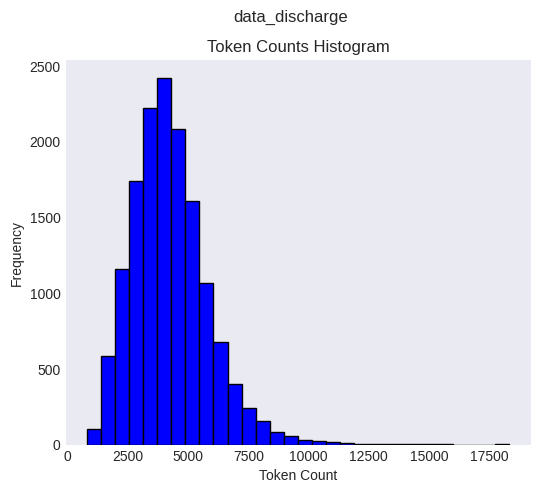

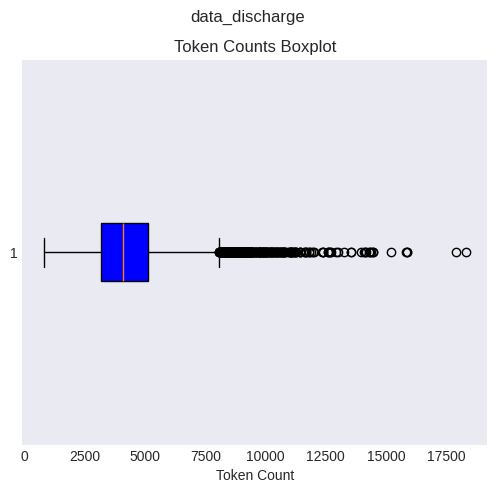

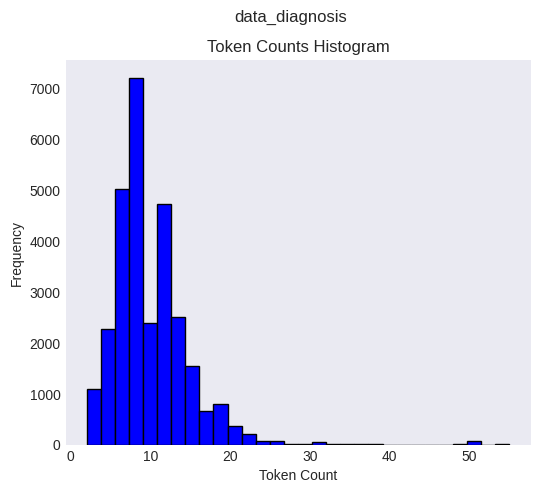

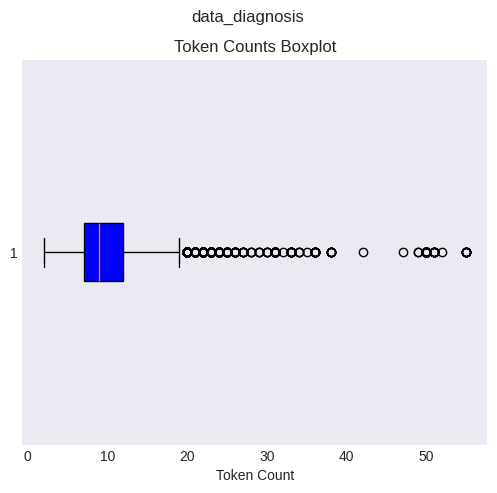

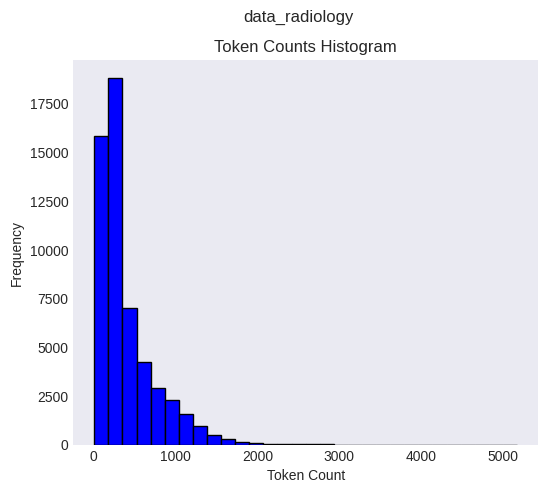

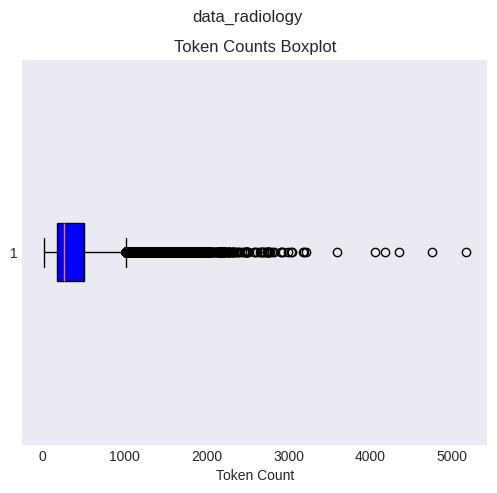

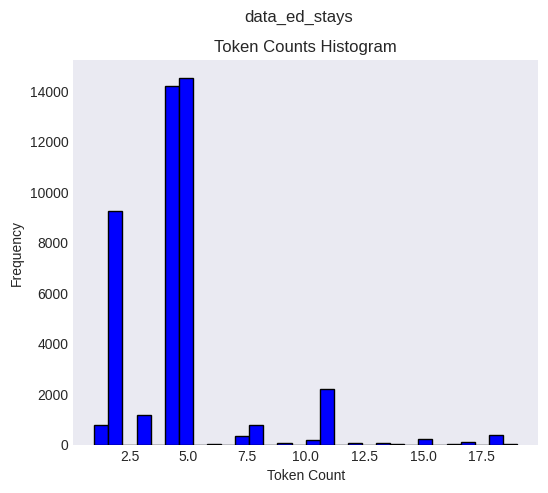

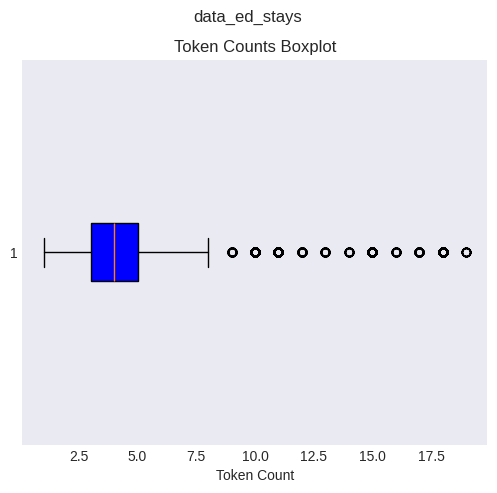

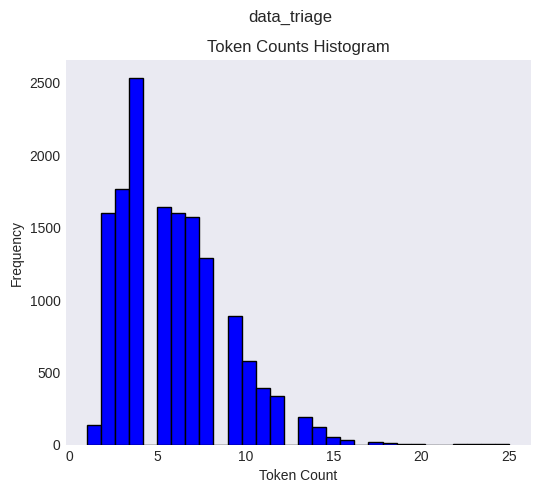

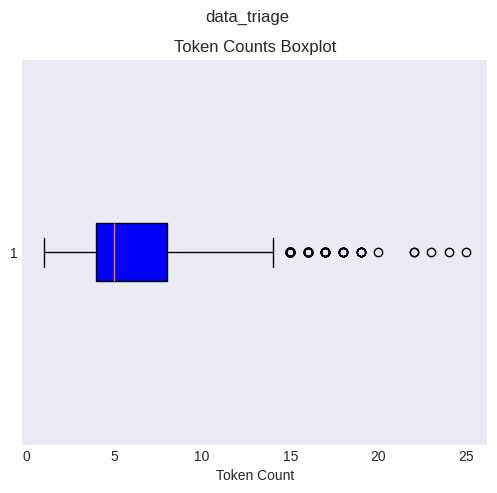

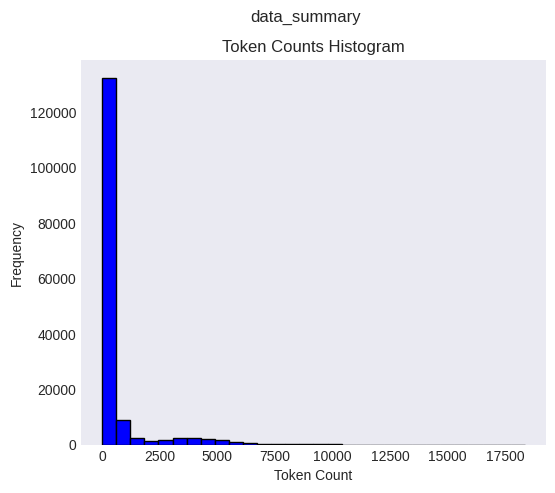

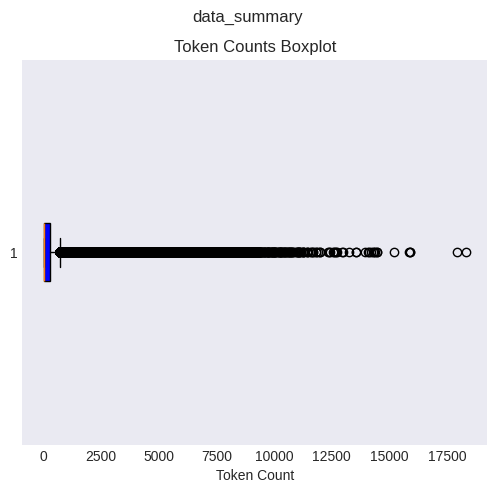

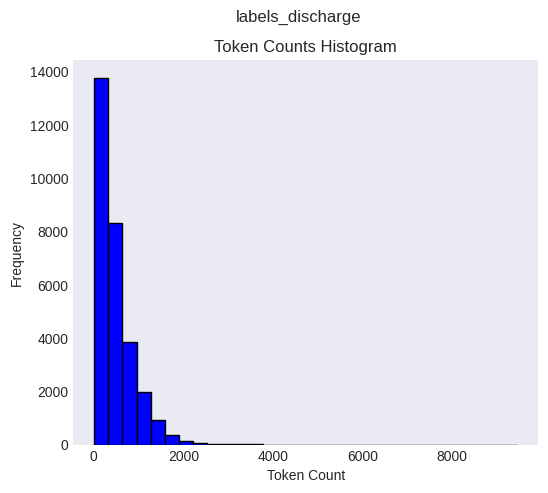

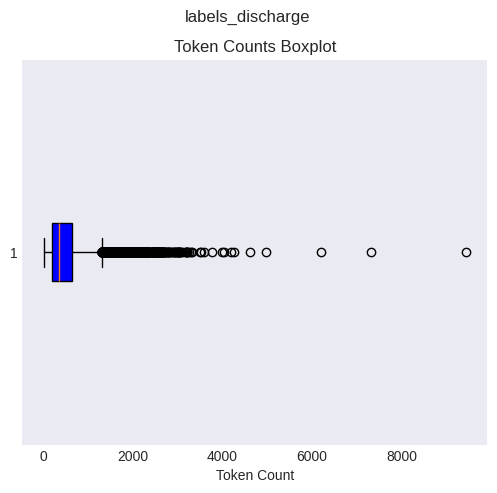

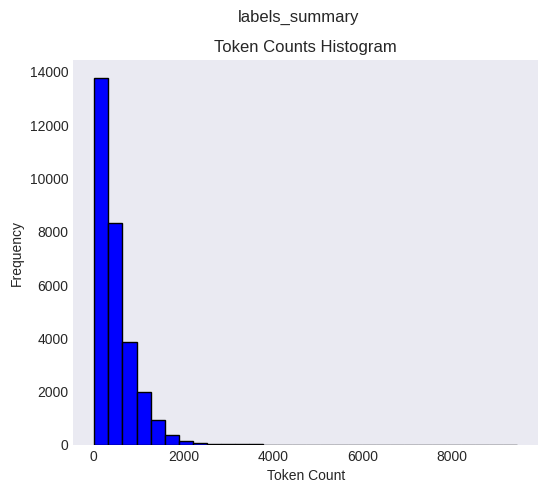

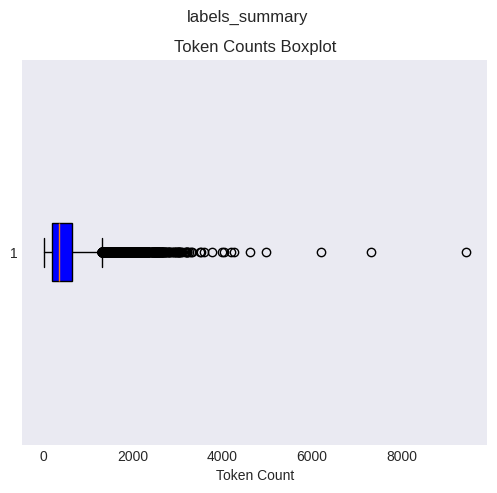

In [12]:
processor = AutoDataProcessor.load("exploration")
report = processor(FILEPATHS, tokenizers=tokenizers, text_columns=text_columns, device_map=device_map)

In [21]:
report["mistralai/Mistral-7B-Instruct-v0.2"]["data"]["discharge"]["tokens"]["stats"]

{'total': 14719,
 'max': 18340,
 'min': 784,
 'mean': 4260.050275154562,
 'skew': 1.1595312838328315,
 'kurt': 3.7073925280739717,
 'std': 1621.2160910102912,
 'pct_25': 3154.0,
 'median': 4086.0,
 'pct_75': 5125.0,
 'pct_95': 7071.0999999999985,
 'pct_99': 9220.82}

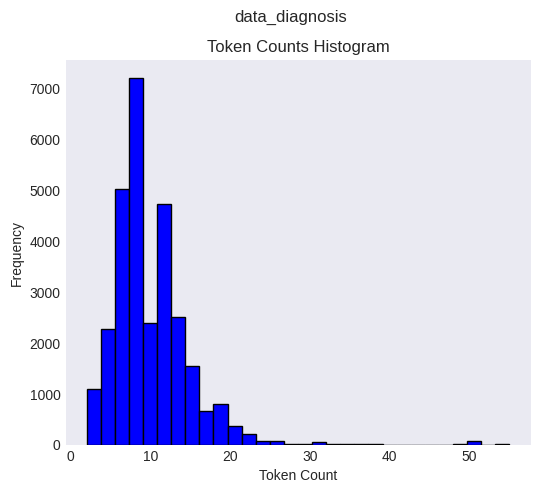

In [20]:
report["mistralai/Mistral-7B-Instruct-v0.2"]["data"]["diagnosis"]["tokens"]["plots"]["hist"]

In [17]:
report["mistralai/Mistral-7B-Instruct-v0.2"]["data"][":summary:"]

{'samples': {'total': 127957},
 'tokens': {'stats': {'total': 157459,
   'max': 18340,
   'min': 1,
   'mean': 539.7282721216317,
   'skew': 3.4417350805304796,
   'kurt': 13.260129170203108,
   'std': 1321.5321248647194,
   'pct_25': 5.0,
   'median': 12.0,
   'pct_75': 281.0,
   'pct_95': 3971.0,
   'pct_99': 6164.420000000013},
  'plots': {'hist': <Figure size 600x500 with 1 Axes>,
   'box': <Figure size 600x500 with 1 Axes>}}}

In [18]:
report["mistralai/Mistral-7B-Instruct-v0.2"]["labels"][":summary:"]

{'samples': {'total': 14719},
 'tokens': {'stats': {'total': 29438,
   'max': 9447,
   'min': 13,
   'mean': 482.0086283035532,
   'skew': 2.461761006214949,
   'kurt': 16.86900414649561,
   'std': 414.5804363891029,
   'pct_25': 196.0,
   'median': 355.0,
   'pct_75': 642.0,
   'pct_95': 1295.0,
   'pct_99': 1885.630000000001},
  'plots': {'hist': <Figure size 600x500 with 1 Axes>,
   'box': <Figure size 600x500 with 1 Axes>}}}